# Agrupamento (CLUSTERING): Realização de um estudo de caso com uma base de transações de crédito (30.000 registros), com o objetivo de identificar grupos de clientes,observando o seu limite do cartão e gastos.

Nota: Agrupamento é uma técnica não supervisionada. Utilizaremos três: algorítmos Kmeans, Agrupamento hierárquico e DBSCAN. E, a biblioteca Scikit-learn.

In [ ]:
!pip install plotly --upgrade

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler

# K-means (cálculo da distância)

## Base idade e salário - algoritmo kmeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x=[20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y=[1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  

x=idade, y= salário

scatter (gráfico de dispersão)

In [ ]:
grafico = px.scatter(x = x, y = y)
grafico.show()

Unir as variáveis, transformando em matriz (idade-salário)

In [ ]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                        [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                        [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [ ]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

Padronização (mesma escala)

In [ ]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

Matriz

In [ ]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

Variável Kmeans-salário n=3 (3 cluster)

In [ ]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

KMeans(n_clusters=3)

In [ ]:
centroides = kmeans_salario.cluster_centers_
centroides

array([[ 0.07703438,  1.11413572],
       [ 0.73953003, -0.72661025],
       [-1.63312883, -0.77505093]])

Centroides com os valores reais (média dos registros)

In [ ]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  41.16666667, 5600.        ],
       [  48.33333333, 1800.        ],
       [  22.66666667, 1700.        ]])

Criando rótulos: Grupo 0: 48 anos e $1800, Grupo 1: 41 anos e $5600, Grupo 2: 22 anos e $1700  

In [ ]:
rotulos = kmeans_salario.labels_
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
grafico1 = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color=rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [12, 12, 12])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

ValueError: ignored

## Dados randômicos

In [ ]:
from sklearn.datasets import make_blobs

Valores aleatórios: colunas x e y
Muda o random_state para observar a associação e distribuição dos clusters. Samples=registros aleatórios

In [ ]:
X_random, y_random = make_blobs(n_samples=200, centers=5, random_state=1)

In [ ]:
X_random

array([[-1.96576392e+00,  5.23446451e+00],
       [-5.16022348e+00, -7.04217141e+00],
       [-6.17937069e+00, -2.16733539e+00],
       [-7.39138168e+00, -9.49590389e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-6.26144310e+00, -3.78347905e+00],
       [-2.04278768e+00,  3.07660864e-01],
       [-4.46426086e+00, -4.39451238e+00],
       [-6.40386190e+00, -6.36106990e+00],
       [ 2.42271161e-04,  5.14853403e+00],
       [-5.99212006e+00, -3.91488289e+00],
       [-6.46137477e+00, -3.14560994e+00],
       [-4.10185174e+00, -1.16625450e+00],
       [-1.01341572e+01, -4.07240274e+00],
       [-5.99004766e+00, -2.82631801e+00],
       [-1.14663009e+00,  4.10839703e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-9.19585147e+00, -3.90678125e+00],
       [-8.30173556e+00, -7.27738918e+00],
       [-7.56309575e+00, -8.46421308e+00],
       [-1.86845414e+00,  4.99311306e+00],
       [-4.22362233e+00, -2.50312346e+00],
       [-1.90838667e+00,  5.86113655e-01],
       [-6.

In [ ]:
y_random

array([0, 2, 3, 2, 2, 3, 4, 3, 2, 0, 3, 3, 4, 1, 3, 0, 0, 1, 2, 2, 0, 3,
       4, 3, 4, 1, 2, 4, 4, 1, 2, 4, 0, 3, 2, 0, 1, 2, 1, 4, 2, 1, 4, 4,
       2, 4, 1, 3, 2, 0, 0, 3, 3, 0, 3, 1, 0, 4, 2, 2, 1, 3, 3, 3, 2, 0,
       0, 1, 4, 2, 1, 4, 2, 4, 4, 1, 2, 3, 0, 4, 1, 1, 3, 2, 3, 0, 2, 2,
       2, 1, 4, 3, 0, 4, 3, 1, 4, 0, 2, 1, 0, 2, 4, 1, 4, 2, 1, 2, 3, 0,
       3, 3, 2, 1, 3, 0, 1, 4, 0, 0, 2, 1, 1, 3, 0, 1, 2, 4, 2, 4, 0, 4,
       3, 3, 1, 1, 3, 0, 0, 3, 3, 3, 0, 0, 4, 2, 4, 0, 2, 3, 4, 3, 0, 4,
       3, 1, 1, 1, 0, 2, 4, 0, 1, 0, 4, 1, 1, 1, 3, 4, 1, 4, 4, 3, 0, 2,
       4, 3, 2, 0, 2, 0, 0, 2, 1, 4, 1, 0, 0, 3, 2, 4, 0, 1, 1, 4, 3, 4,
       2, 1])

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans

Clusters

In [ ]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

In [ ]:
kmeans_blobs = KMeans(n_clusters=5)
kmeans_blobs.fit(X_random)

KMeans(n_clusters=5)

In [ ]:
rotulos = kmeans_blobs.predict(X_random)
rotulos

array([0, 1, 4, 1, 1, 4, 3, 4, 1, 0, 4, 4, 4, 2, 4, 0, 0, 2, 1, 1, 0, 4,
       3, 4, 3, 2, 1, 3, 3, 2, 1, 3, 0, 4, 1, 0, 2, 1, 2, 0, 2, 2, 3, 3,
       1, 3, 2, 4, 1, 3, 0, 4, 4, 0, 4, 2, 0, 4, 1, 1, 2, 4, 4, 4, 1, 3,
       0, 2, 3, 1, 2, 3, 1, 3, 3, 2, 1, 2, 0, 3, 2, 2, 4, 1, 4, 0, 1, 1,
       1, 2, 3, 4, 0, 3, 4, 2, 3, 0, 1, 2, 0, 1, 3, 2, 3, 1, 2, 1, 4, 0,
       4, 4, 1, 2, 4, 0, 2, 3, 0, 0, 1, 2, 2, 4, 0, 2, 1, 3, 1, 3, 0, 3,
       4, 4, 2, 2, 4, 0, 0, 4, 4, 4, 0, 0, 3, 1, 3, 0, 1, 4, 3, 4, 0, 3,
       4, 2, 2, 2, 0, 1, 3, 0, 2, 0, 3, 2, 2, 2, 4, 3, 2, 3, 3, 4, 0, 1,
       3, 4, 1, 0, 1, 0, 0, 1, 2, 3, 2, 0, 0, 4, 1, 3, 0, 2, 2, 3, 4, 3,
       1, 2], dtype=int32)

Centroides

In [ ]:
centroides = kmeans_blobs.cluster_centers_
centroides

array([[-1.58338528,  4.50520457],
       [-6.87958999, -8.11648104],
       [-9.85620522, -3.91021738],
       [-2.17069756,  1.02591979],
       [-5.90368078, -3.04489641]])

Rótulos em cores diferentes - 5 grupos diferentes

In [ ]:
grafico1 = px.scatter(x = X_random[:,0], y = X_random[:,1], color = rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [5, 5, 5, 5, 5])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

## Base de dados cartão de crédito - 1 atributo

- Fonte: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

header = cabeçalho
A última coluna da tabela identifica os pagamentos: 1 não pagou e 0 pagou.

In [ ]:
import pandas as pd
base_cartao = pd.read_csv('/content/credit_card_clients.csv', header = 1)
base_cartao

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0          1      20000    2  ...         0         0                           1
1          2     120000    2  ...         0      2000                           1
2          3      90000    2  ...      1000      5000                           0
3          4      50000    2  ...      1069      1000                           0
4          5      50000    1  ...       689       679                           0
...      ...        ...  ...  ...       ...       ...                         ...
29995  29996     220000    1  ...      5000      1000                           0
29996  29997     150000    1  ...         0         0                           0
29997  29998      30000    1  ...      2000      3100                           1
29998  29999      80000    1  ...     52964      1804                           1
29999  30000      50000    1  ...      1000      1000                           1

[30000 rows x 25 columns]

Somatório dos atributos Bill (para saber o total de dívidas do cliente)

In [ ]:
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']

In [ ]:
base_cartao

ID  LIMIT_BAL  SEX  ...  PAY_AMT6  default payment next month  BILL_TOTAL
0          1      20000    2  ...         0                           1        7704
1          2     120000    2  ...      2000                           1       17077
2          3      90000    2  ...      5000                           0      101653
3          4      50000    2  ...      1000                           0      231334
4          5      50000    1  ...       679                           0      109339
...      ...        ...  ...  ...       ...                         ...         ...
29995  29996     220000    1  ...      1000                           0      725349
29996  29997     150000    1  ...         0                           0       21182
29997  29998      30000    1  ...      3100                           1       70496
29998  29999      80000    1  ...      1804                           1      266611
29999  30000      50000    1  ...      1000                           1      230874

[30000 rows x 26 columns]

Variável X-cartão: selecionando (iloc) as colunas 1 e 25, values configura a biblioteca array. Observa-se o valor do limite e a dívida total.

In [ ]:
X_cartao = base_cartao.iloc[:, [1, 25]].values
X_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans

Para escalonar os dados:

In [ ]:
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)

In [ ]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

Método do cotovelo - para definir o número de clusters

In [ ]:
wcss = []
for i in range(1, 11):
  #print(i)
  kmeans_cartao = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao.fit(X_cartao)
  wcss.append(kmeans_cartao.inertia_)

In [ ]:
wcss

[59999.99999999978,
 35196.57080583435,
 20128.132558347686,
 14943.809173865899,
 10707.537016753624,
 8603.395384848965,
 7400.069599689482,
 6353.473303353463,
 5665.823857740179,
 5052.188166408734]

Para encontrar o número ideal de cluster é interessante visualizar o gráfico. O número ideal aqui seria 3 ou 4 clusters, porque após isso não diminui mais o número de registros.

In [ ]:
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

In [ ]:
kmeans_cartao = KMeans(n_clusters=4, random_state=0)
rotulos = kmeans_cartao.fit_predict(X_cartao)

Eixo x=limite;  eixo y=gastos. Quanto
O grupo azul, limite baixo e gastam pouco. Grupo rosa: limite alto, gastam pouco. Amarelo: gastam mais e limite médio. Roxo: limite grande e não gastam muito. Laranja:limite alto e gasto alto. Observa-se um outlier.

In [ ]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color=rotulos)
grafico.show()

In [ ]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [     2, 120000,      2, ...,      1,  17077,      0],
       [     3,  90000,      2, ...,      0, 101653,      0],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      0],
       [ 29999,  80000,      1, ...,      1, 266611,      0],
       [ 30000,  50000,      1, ...,      1, 230874,      0]])

Lista ordenada

In [ ]:
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16789,  30000,      1, ...,      1,  14274,      0],
       [ 16788,  30000,      1, ...,      1,  90453,      0],
       ...,
       [ 20882, 110000,      1, ...,      0, 554308,      3],
       [ 20744, 220000,      1, ...,      0, 452961,      3],
       [ 20270, 150000,      2, ...,      0, 546939,      3]])

## Base de dados cartão de crédito - Agrupamento com :mais atributos

In [ ]:
base_cartao.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_TOTAL'],
      dtype='object')

Mais atributos

In [ ]:
X_cartao_mais = base_cartao.iloc[:,[1,2,3,4,5,25]].values
X_cartao_mais

Escalonamento

In [ ]:
scaler_cartao_mais = StandardScaler()
X_cartao_mais = scaler_cartao.fit_transform(X_cartao_mais)

In [ ]:
X_cartao_mais

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]])

Número ideal de cluster

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans_cartao_mais = KMeans(n_clusters = i, random_state = 0)
  kmeans_cartao_mais.fit(X_cartao_mais)
  wcss.append(kmeans_cartao_mais.inertia_)

In [ ]:
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

In [ ]:
kmeans_cartao_mais = KMeans(n_clusters=2, random_state=0)
rotulos = kmeans_cartao_mais.fit_predict(X_cartao_mais)

In [ ]:
rotulos

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

PCA _ Técnica que combina os atributos similares, gerando apenas dois atributos como resultado

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_cartao_mais_pca = pca.fit_transform(X_cartao_mais)

In [ ]:
X_cartao_mais_pca.shape

(30000, 2)

In [ ]:
X_cartao_mais_pca

array([[-0.74082054, -1.13671858],
       [-1.48027121, -0.30100547],
       [-0.94737386, -0.48666789],
       ...,
       [-0.79468657, -0.90012663],
       [ 1.17562376, -1.54746987],
       [ 1.13614987, -1.14039836]])

In [ ]:
grafico = px.scatter(x= X_cartao_mais_pca[:,0], y = X_cartao_mais_pca[:,1], color=rotulos)
grafico.show()

In [ ]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16671,  20000,      1, ...,      0,  20753,      0],
       [ 16669,  60000,      1, ...,      0, 334495,      0],
       ...,
       [  6249, 390000,      1, ...,      0, 393330,      1],
       [ 17363,  50000,      2, ...,      0,  53295,      1],
       [ 15000,  50000,      1, ...,      0, 249711,      1]])

# Agrupamento hierárquico

## Base salário idade

In [ ]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [ ]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1])
grafico.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

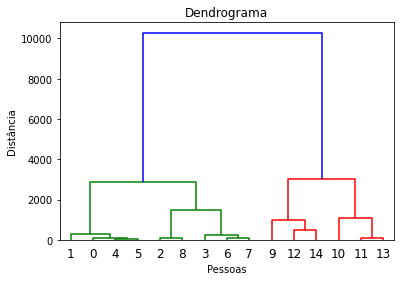

In [ ]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância');

In [ ]:
from sklearn.cluster import AgglomerativeClustering

fit_predict:treinamento

In [ ]:
hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
rotulos = hc_salario.fit_predict(base_salario)

In [ ]:
rotulos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2])

In [ ]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color = rotulos)
grafico.show()

## Base cartão de crédito - Agrupamento hierárquico

In [ ]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [ ]:
dendrograma = dendrogram(linkage(X_cartao, method = 'ward'))

Error in callback <function flush_figures at 0x7f8812a45320> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
hc_cartao = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
rotulos = hc_cartao.fit_predict(X_cartao)

KeyboardInterrupt: ignored

In [ ]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color = rotulos)
grafico.show()

# DBSCAN

## Base salário idade

In [ ]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                        [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                        [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [ ]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [ ]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [ ]:
from sklearn.cluster import DBSCAN

Criação do agrupamento: Região densa (define-se pelo min_samples)

In [ ]:
dbscan_salario = DBSCAN(eps = 0.95, min_samples=2)
dbscan_salario.fit(base_salario)

DBSCAN(eps=0.95, min_samples=2)

In [ ]:
rotulos = dbscan_salario.labels_
rotulos

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [ ]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color = rotulos)
grafico.show()

## DBSCAN - Base cartão de crédito

Colunas: Limite x gasto

In [ ]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [ ]:
Treinamento e previsões

In [ ]:
dbscan_cartao = DBSCAN(eps=0.37, min_samples=5)
rotulos = dbscan_cartao.fit_predict(X_cartao)

In [ ]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

Contagem de quantos elementos temos em cada grupo

In [ ]:
np.unique(rotulos, return_counts=True)

(array([-1,  0,  1,  2]), array([   52, 29920,    18,    10]))

In [ ]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color = rotulos)
grafico.show()

# Comparando: K-means x Hierárquico x DBSCAN

In [ ]:
from sklearn import datasets

In [ ]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise = 0.09)

In [ ]:
X_random

array([[ 4.60575285e-02,  3.77065579e-01],
       [ 1.82815366e+00,  6.91654938e-02],
       [-4.12343227e-01,  9.36244805e-01],
       ...,
       [ 1.07358224e+00, -5.62563983e-01],
       [ 1.54406031e-03,  2.73073937e-01],
       [ 3.11645872e-01,  1.03186421e+00]])

In [ ]:
y_random

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
np.unique(y_random)

array([0, 1])

In [ ]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
rotulos = kmeans.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
rotulos = hc.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

In [ ]:
dbscan = DBSCAN(eps=0.1)
rotulos = dbscan.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

Nota: Comparando os três algorítmos aplicados a essa base de dados, percebe-se que o Kmeans, não se adapta muito e não consegue separar os dois grupos, porque a distância entre eles é muito próxima. O agrupamento hierárquico apresenta um resultado melhor que o Kmeans, agrupou corretamente os registros. O algoritmo DBSCAM, modificando o eps de 0,5 para 0,1, definindo um raio pequeno ele conseguiu fazer o agrupamento. Se aumentar o raio, o algoritmo coloca todos os registros no mesmo grupo. O DBSCAM é apropriado para bases mais complexas. Sempre deve-se observar os parâmetros do raio para obter melhores resultados.  